In [ ]:
import serial
import time
#Serial takes these two parameters: serial device and baudrate

ser = serial.Serial('COM5', 9600)
f = open("DAC_VG_5ohm.csv", "at")

print("arranca")


try:
    while (True):
        line = ser.readline() 
        data=line.decode().replace('\n','')
        if(data.find("255",0,3)==0):
            break
        else:
            f.write(data)
except:
    print("error")
    f.close()
    ser.close() 

    
f.close()
ser.close() 
print("listo")



In [ ]:
import serial
import time
#Serial takes these two parameters: serial device and baudrate

ser = serial.Serial('COM5', 9600)
f = open("DAC_VG_5ohm.csv", "at")

print("arranca")


try:
    while (True):
        line = ser.readline() 
        data=line.decode().replace('\n','')
        
        if(data.find("255",0,3)==0):
            break
        else:
            f.write(data)
except:
    print("error")
    f.close()
    ser.close() 

    
f.close()
ser.close() 
print("listo")



arranca


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import optimize

df=pd.read_csv("DAC_V_prueba_resistencias1.csv",header=None)

bit=df[0].to_numpy()
Vin=df[1].to_numpy()
Vlec=df[2].to_numpy()
R1=99.9
R2=330
v2=[(vin*R1)/(R1+R2) for vin in Vin]

plt.grid()
#plt.xlim(0,0.1)
#plt.ylim(0,0.1)
plt.plot(Vin,Vlec)
plt.plot(Vin,v2)



In [ ]:
import serial
import time
#Serial takes these two parameters: serial device and baudrate

ser = serial.Serial('COM5', 9600)
f = open("DAC_V_Rled.csv", "at")

inicio = time.time()
print("arranca")
time.sleep(1)
fin=time.time()
minutes=5
i=1
print((fin-inicio))

while (fin-inicio)<=(60*minutes):#segundos
    # Reading all bytes available bytes till EOL
    line = ser.readline() 
    f.write(line.decode().replace('\n',''))
    """ if line:
     #print("j")
     # Converting Byte Strings into unicode strings
     string = line.decode()  
     # Converting Unicode String into integer
     f.write(string+"\n") 
    """        
    #print(fin-inicio,i*((minutes/10)*60))
    if (fin-inicio)>=i*((minutes/10)*60) and (fin-inicio)<(i*((minutes/10)*60)+0.5):
        print(i*10,"%", (fin-inicio)/60)
        i+=1
    fin=time.time()     
    
f.close()
ser.close() 
print("listo")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import optimize

df=pd.read_csv("DAC_V_prueba.csv",header=None)

bit=df[0].to_numpy()
Vin=df[1].to_numpy()
Vlec=df[2].to_numpy()
R1=99.9
R2=330
v2=[(vin*R1)/(R1+R2) for vin in Vin]

plt.grid()
plt.xlim(0,0.02)
plt.ylim(0,0.02)
plt.plot(Vin,Vlec)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import optimize

df=pd.read_csv("DAC_V_Bled.csv",header=None)

Vin=df[0].to_numpy()
Vr=df[1].to_numpy()
R=99.9

Vd=Vin-Vr
I=Vr/R
print(np.average(I))

plt.grid()
plt.plot(Vin,I)



[ 0.06754551 -0.11492286]
1.7014136312566726
h= 6.79941600837875e-34
1.6515138877304192


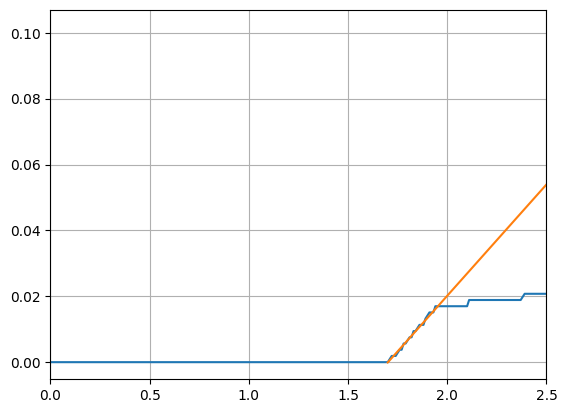

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import optimize

def linear(x,m,b):
    return m*x+b

df=pd.read_csv("DAC_VR_5ohm.csv",header=None)

bit=df[0].to_numpy()
Vin=df[1].to_numpy()
Vr=df[2].to_numpy()
Vr_err=df[3].to_numpy()

R=5.3
Vd=Vin-Vr
I=Vr/R

Linear_par, Linear_cov = optimize.curve_fit(linear, Vin[135:157], I[135:157])
print(Linear_par)
plt.grid()
plt.xlim(0,2.5)
#plt.ylim(0,0.015)
#plt.errorbar(Vin,I,yerr=Vr_err)
plt.plot(Vin,I)
plt.plot(Vin[135:], linear(Vin[135:], *Linear_par))

deltaV=-1*Linear_par[1]/Linear_par[0]
print(deltaV)
waveL=631*(10**-9)
c=3*(10**8)
e=1.9*(10**-19)
print("h=",deltaV*waveL*e/c)
print(6.6*(10**-34)*c/(waveL*e))

In [ ]:
s="255,5"

x=s.find("255",0,3)
print(x)

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import optimize


target=os.getcwd()+'\LEDs'


fig, (ax1) = plt.subplots(1, 1, layout='constrained')
ax1.set_title('V vs I')
ax1.set_xlabel('Voltaje (V)')
ax1.set_ylabel('Corriente (A)')

for top,dirs,files in os.walk(target):
    print(files)
    for file in files:
        a=target+'\\'+file
        print(a)
        try:
            df=pd.read_csv(a,sep=',',header=None)
        except:
            print("nulo")
        
        byt=df[0]
        Vin=df[1].to_numpy()
        Vr=df[2].to_numpy()
        R=99.9

        Vd=Vin-Vr
        I=Vr/R
        print(byt[0],byt[21])
#print(np.average(I))

plt.grid()
#plt.plot(Vin,I)
